In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [2]:
train_df = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

In [3]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [5]:
print(train_df.shape)
print(test_df.shape)

(8693, 14)
(4277, 13)


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
train_df.describe(include=["O"])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,9280_02,Earth,False,G/734/S,TRAPPIST-1e,False,Ankalik Nateansive
freq,1,4602,5439,8,5915,8291,2


In [9]:
test_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [10]:
print(train_df.isna().sum())
print("\ntotal missing values of training set: ", train_df.isna().sum().sum())
print(" ")
print("-"*30)
print(" ")
print(test_df.isna().sum())
print("\ntotal missing values of test set: ", test_df.isna().sum().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

total missing values of training set:  2324
 
------------------------------
 
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

total missing values of test set:  1117


In [11]:
datasets = [train_df, test_df]
amenities = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

decks = train_df['Cabin'].str.split('/', expand=True)[0]
print(decks.unique())
print(decks.value_counts())

for dataset in datasets:
    dataset.loc[dataset.CryoSleep == True, amenities] = dataset.loc[dataset.CryoSleep == True, amenities].fillna(0)
    dataset.loc[(dataset.CryoSleep.isna()) & (dataset[amenities].sum(axis=1)>0), "CryoSleep"] = False
    dataset.CryoSleep = dataset.CryoSleep.fillna(True)
    dataset[amenities] = dataset[amenities].fillna(dataset[amenities].median())
    dataset.Age = dataset.Age.fillna(dataset.Age.median())
    dataset.VIP = dataset.VIP.fillna(False)
    dataset.Destination = dataset.Destination.fillna("TRAPPIST-1e")
    dataset.Cabin = dataset.Cabin.fillna("T/0/P")
    dataset["Group"] = dataset["PassengerId"].str.split("_", expand= True)[0]
    dataset.HomePlanet = dataset.groupby("Group")["HomePlanet"].ffill().bfill()
    dataset.HomePlanet = dataset.HomePlanet.fillna(train_df.HomePlanet.mode()[0])

['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T']
0
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64


In [12]:
print(train_df.isna().sum())
print("\ntotal missing values of training set: ", train_df.isna().sum().sum())
print(" ")
print("-"*30)
print(" ")
print(test_df.isna().sum())
print("\ntotal missing values of test set: ", test_df.isna().sum().sum())

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Group             0
dtype: int64

total missing values of training set:  200
 
------------------------------
 
PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
Group            0
dtype: int64

total missing values of test set:  94


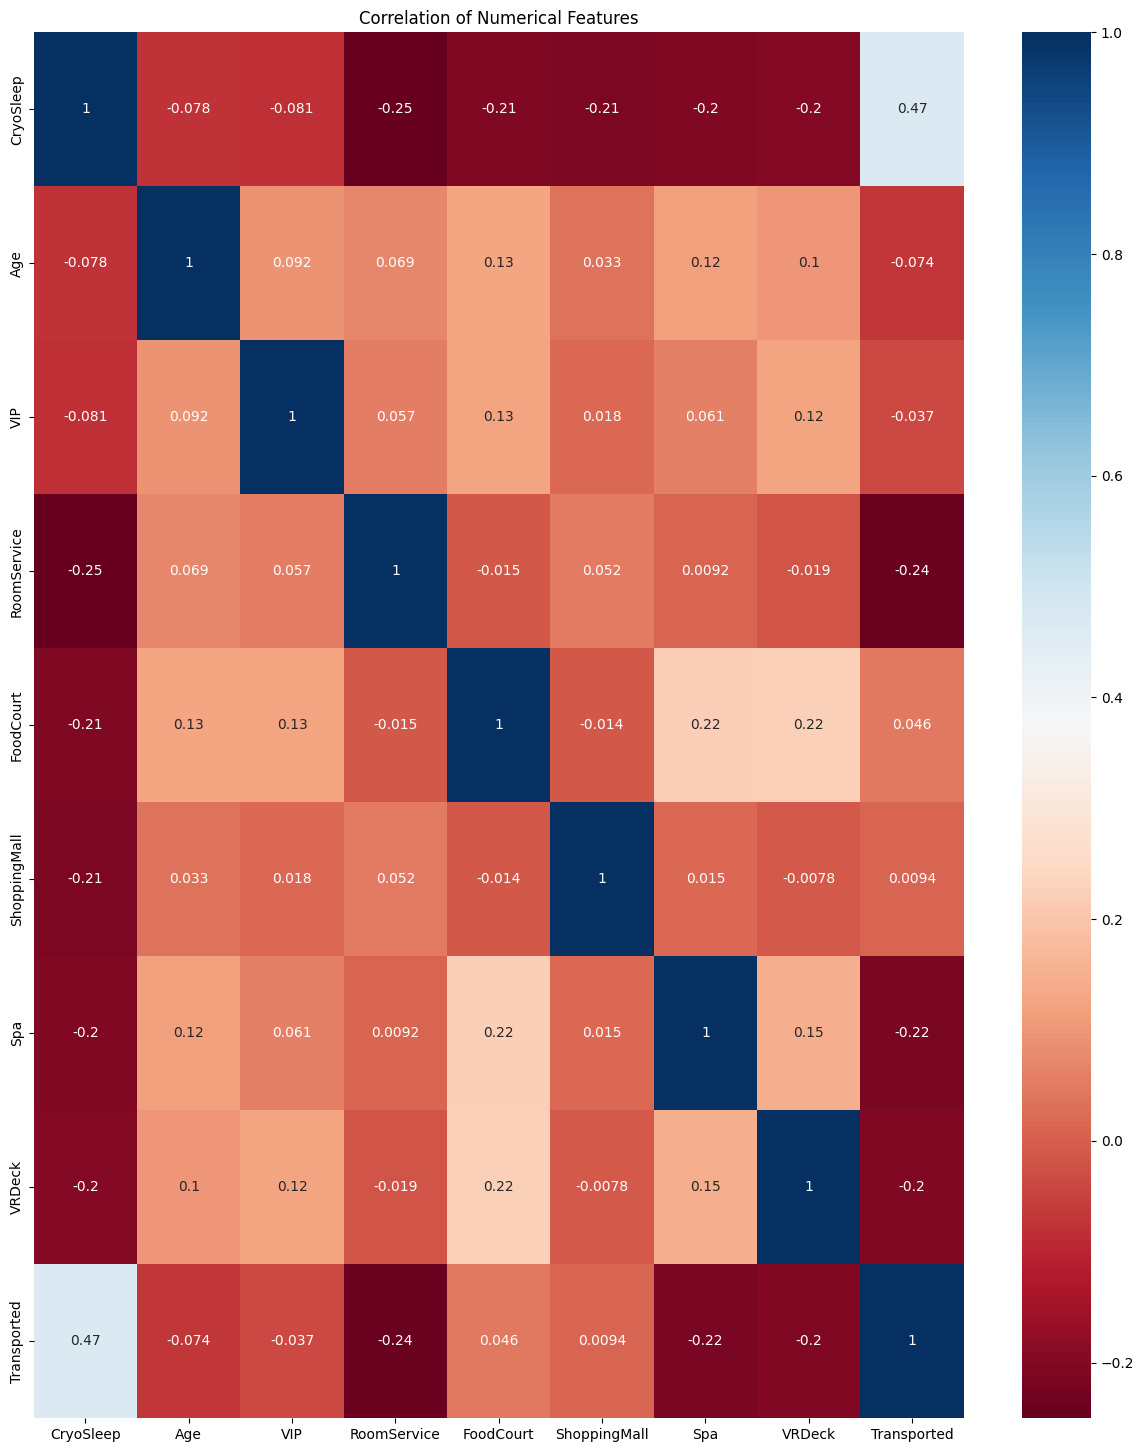

In [13]:
train_df['CryoSleep'] = train_df['CryoSleep'].astype(int)
test_df['CryoSleep'] = test_df['CryoSleep'].astype(int)

plt.figure(figsize=(15,18))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap="RdBu")
plt.title("Correlation of Numerical Features")
plt.show()

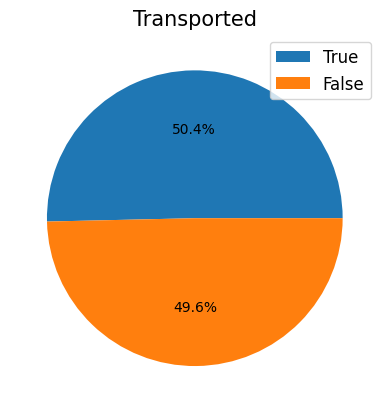

In [14]:
plt.pie(train_df.Transported.value_counts(), autopct='%.1f%%')
plt.title("Transported", size=15)
plt.legend(("True","False"), fontsize=12)
plt.show()

<Axes: xlabel='HomePlanet', ylabel='count'>

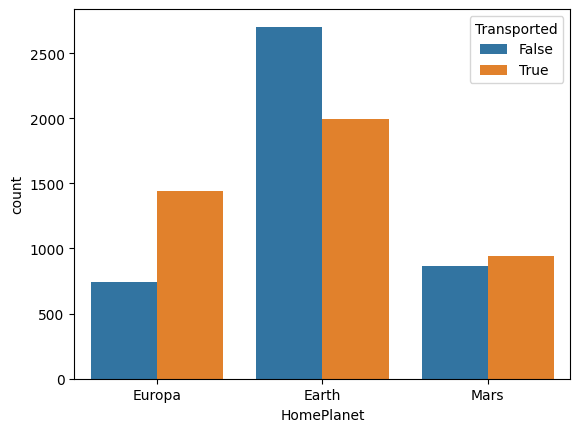

In [15]:
sns.countplot(data=train_df, x="HomePlanet", hue="Transported")

<Axes: xlabel='VIP', ylabel='count'>

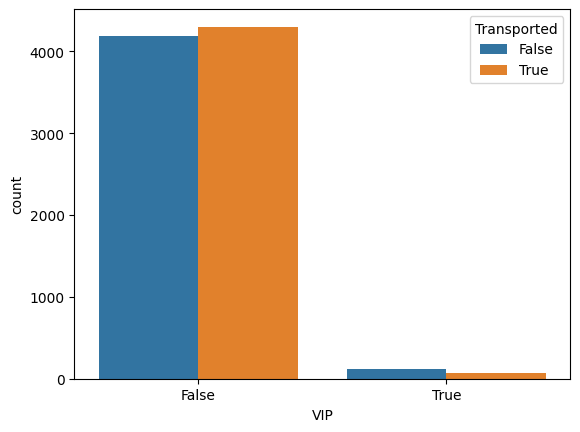

In [16]:
sns.countplot(data=train_df, x="VIP", hue="Transported")

<Axes: xlabel='CryoSleep', ylabel='count'>

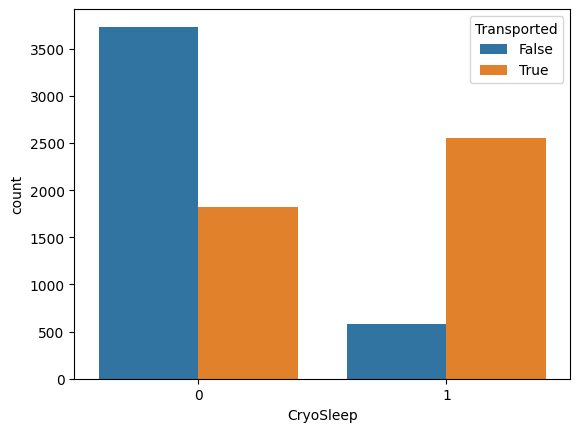

In [17]:
sns.countplot(data=train_df, x="CryoSleep", hue="Transported")

<Axes: xlabel='Destination', ylabel='count'>

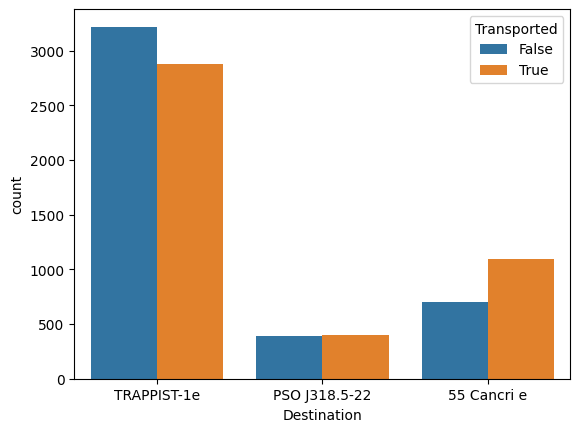

In [18]:
sns.countplot(data=train_df, x="Destination", hue="Transported")

<Axes: xlabel='Transported', ylabel='Age'>

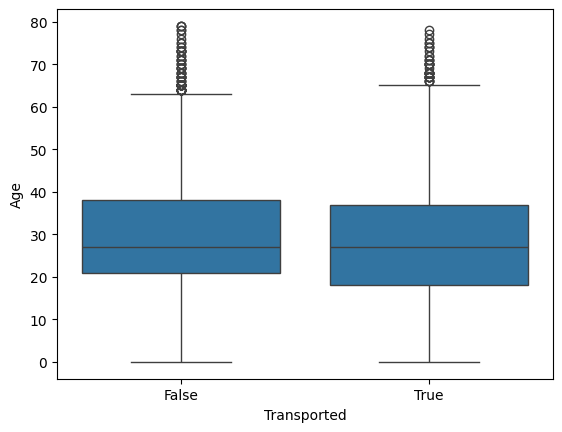

In [19]:
sns.boxplot(x=train_df.Transported, y=train_df.Age)

<Axes: xlabel='Deck', ylabel='count'>

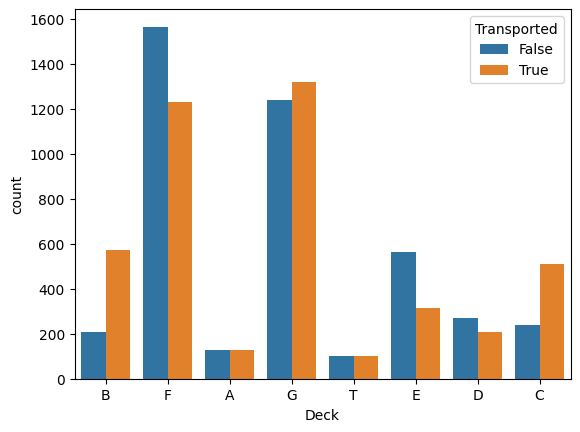

In [20]:
train_df[['Deck','Num','Side']] = train_df.Cabin.str.split('/',expand=True)
test_df[['Deck','Num','Side']] = test_df.Cabin.str.split('/',expand=True)
sns.countplot(data=train_df, x="Deck", hue="Transported")

<Axes: xlabel='Side', ylabel='count'>

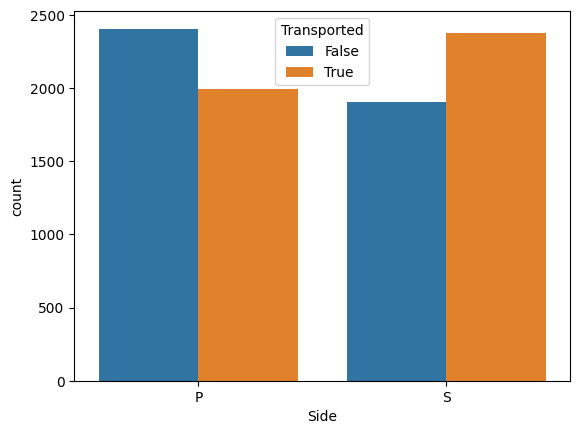

In [21]:
sns.countplot(data=train_df, x="Side", hue="Transported")

In [22]:
train_df["AgeBand"] = pd.cut(train_df["Age"], 5)
train_df.groupby("AgeBand", as_index=0)["Transported"].mean().sort_values(by="AgeBand")

,AgeBand,Transported
0,"(-0.079, 15.8]",0.648387
1,"(15.8, 31.6]",0.475495
2,"(31.6, 47.4]",0.485510
3,"(47.4, 63.2]",0.486747
4,"(63.2, 79.0]",0.463235


In [23]:
for dataset in datasets:
    dataset.loc[dataset["Age"] <= 15.8, "Age"] = 0
    dataset.loc[(dataset["Age"] > 15.8) & (dataset["Age"] <= 31.6) , "Age"] = 1
    dataset.loc[(dataset["Age"] > 31.6) & (dataset["Age"] <= 47.4) , "Age"] = 2
    dataset.loc[(dataset["Age"] > 47.4) & (dataset["Age"] <= 63.2) , "Age"] = 3
    dataset.loc[(dataset["Age"] > 63.2), "Age"] = 4

In [24]:
train_df["Total_Expenses"] = train_df[amenities].sum(axis=1) 
test_df["Total_Expenses"] = test_df[amenities].sum(axis=1) 

train_df["GroupSize"] = train_df.groupby("Group")["Group"].transform("count")
train_df["IsAlone"] = (train_df.GroupSize == 1).astype(int)
test_df["GroupSize"] = test_df.groupby("Group")["Group"].transform("count")
test_df["IsAlone"] = (test_df.GroupSize == 1).astype(int)

train_df["Age"] = train_df["Age"].astype(int)
test_df["Age"] = test_df["Age"].astype(int)
train_df["VIP"] = train_df["VIP"].astype(int)
test_df["VIP"] = test_df["VIP"].astype(int)
train_df["Transported"] = train_df["Transported"].astype(int)

train_df['Num'] = pd.to_numeric(train_df['Num']).astype(int)
test_df['Num'] = pd.to_numeric(test_df['Num']).astype(int)

train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,Group,Deck,Num,Side,AgeBand,Total_Expenses,GroupSize,IsAlone
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,2,0,0.0,0.0,0.0,...,Maham Ofracculy,0,0001,B,0,P,"(31.6, 47.4]",0.0,1,1
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,1,0,109.0,9.0,25.0,...,Juanna Vines,1,0002,F,0,S,"(15.8, 31.6]",736.0,1,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,3,1,43.0,3576.0,0.0,...,Altark Susent,0,0003,A,0,S,"(47.4, 63.2]",10383.0,2,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,2,0,0.0,1283.0,371.0,...,Solam Susent,0,0003,A,0,S,"(31.6, 47.4]",5176.0,2,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,1,0,303.0,70.0,151.0,...,Willy Santantines,1,0004,F,1,S,"(15.8, 31.6]",1091.0,1,1


In [25]:
train_df = train_df.drop(["Cabin","Name","Group","AgeBand"], axis=1)
test_df = test_df.drop(["Cabin","Name","Group"], axis=1)

train_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,Total_Expenses,GroupSize,IsAlone
0,0001_01,Europa,0,TRAPPIST-1e,2,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P,0.0,1,1
1,0002_01,Earth,0,TRAPPIST-1e,1,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S,736.0,1,1
2,0003_01,Europa,0,TRAPPIST-1e,3,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S,10383.0,2,0
3,0003_02,Europa,0,TRAPPIST-1e,2,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S,5176.0,2,0
4,0004_01,Earth,0,TRAPPIST-1e,1,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S,1091.0,1,1


In [26]:
cat_cols = ["HomePlanet", "Destination", "Deck", "Side"]

for cat in cat_cols:
    le = LabelEncoder()
    arr = np.concatenate((train_df[cat],test_df[cat])).astype(str)
    le.fit(arr)
    train_df[cat] = le.transform(train_df[cat].astype(str))
    test_df[cat] = le.transform(test_df[cat].astype(str))

train_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,Total_Expenses,GroupSize,IsAlone
0,0001_01,1,0,2,2,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0.0,1,1
1,0002_01,0,0,2,1,0,109.0,9.0,25.0,549.0,44.0,1,5,0,1,736.0,1,1
2,0003_01,1,0,2,3,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0,1,10383.0,2,0
3,0003_02,1,0,2,2,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,1,5176.0,2,0
4,0004_01,0,0,2,1,0,303.0,70.0,151.0,565.0,2.0,1,5,1,1,1091.0,1,1


In [27]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side,Total_Expenses,GroupSize,IsAlone
0,0013_01,0,1,2,1,0,0.0,0.0,0.0,0.0,0.0,6,3,1,0.0,1,1
1,0018_01,0,0,2,1,0,0.0,9.0,0.0,2823.0,0.0,5,4,1,2832.0,1,1
2,0019_01,1,1,0,1,0,0.0,0.0,0.0,0.0,0.0,2,0,1,0.0,1,1
3,0021_01,1,0,2,2,0,0.0,6652.0,0.0,181.0,585.0,2,1,1,7418.0,1,1
4,0023_01,0,0,2,1,0,10.0,0.0,635.0,0.0,0.0,5,5,1,645.0,1,1


<Axes: >

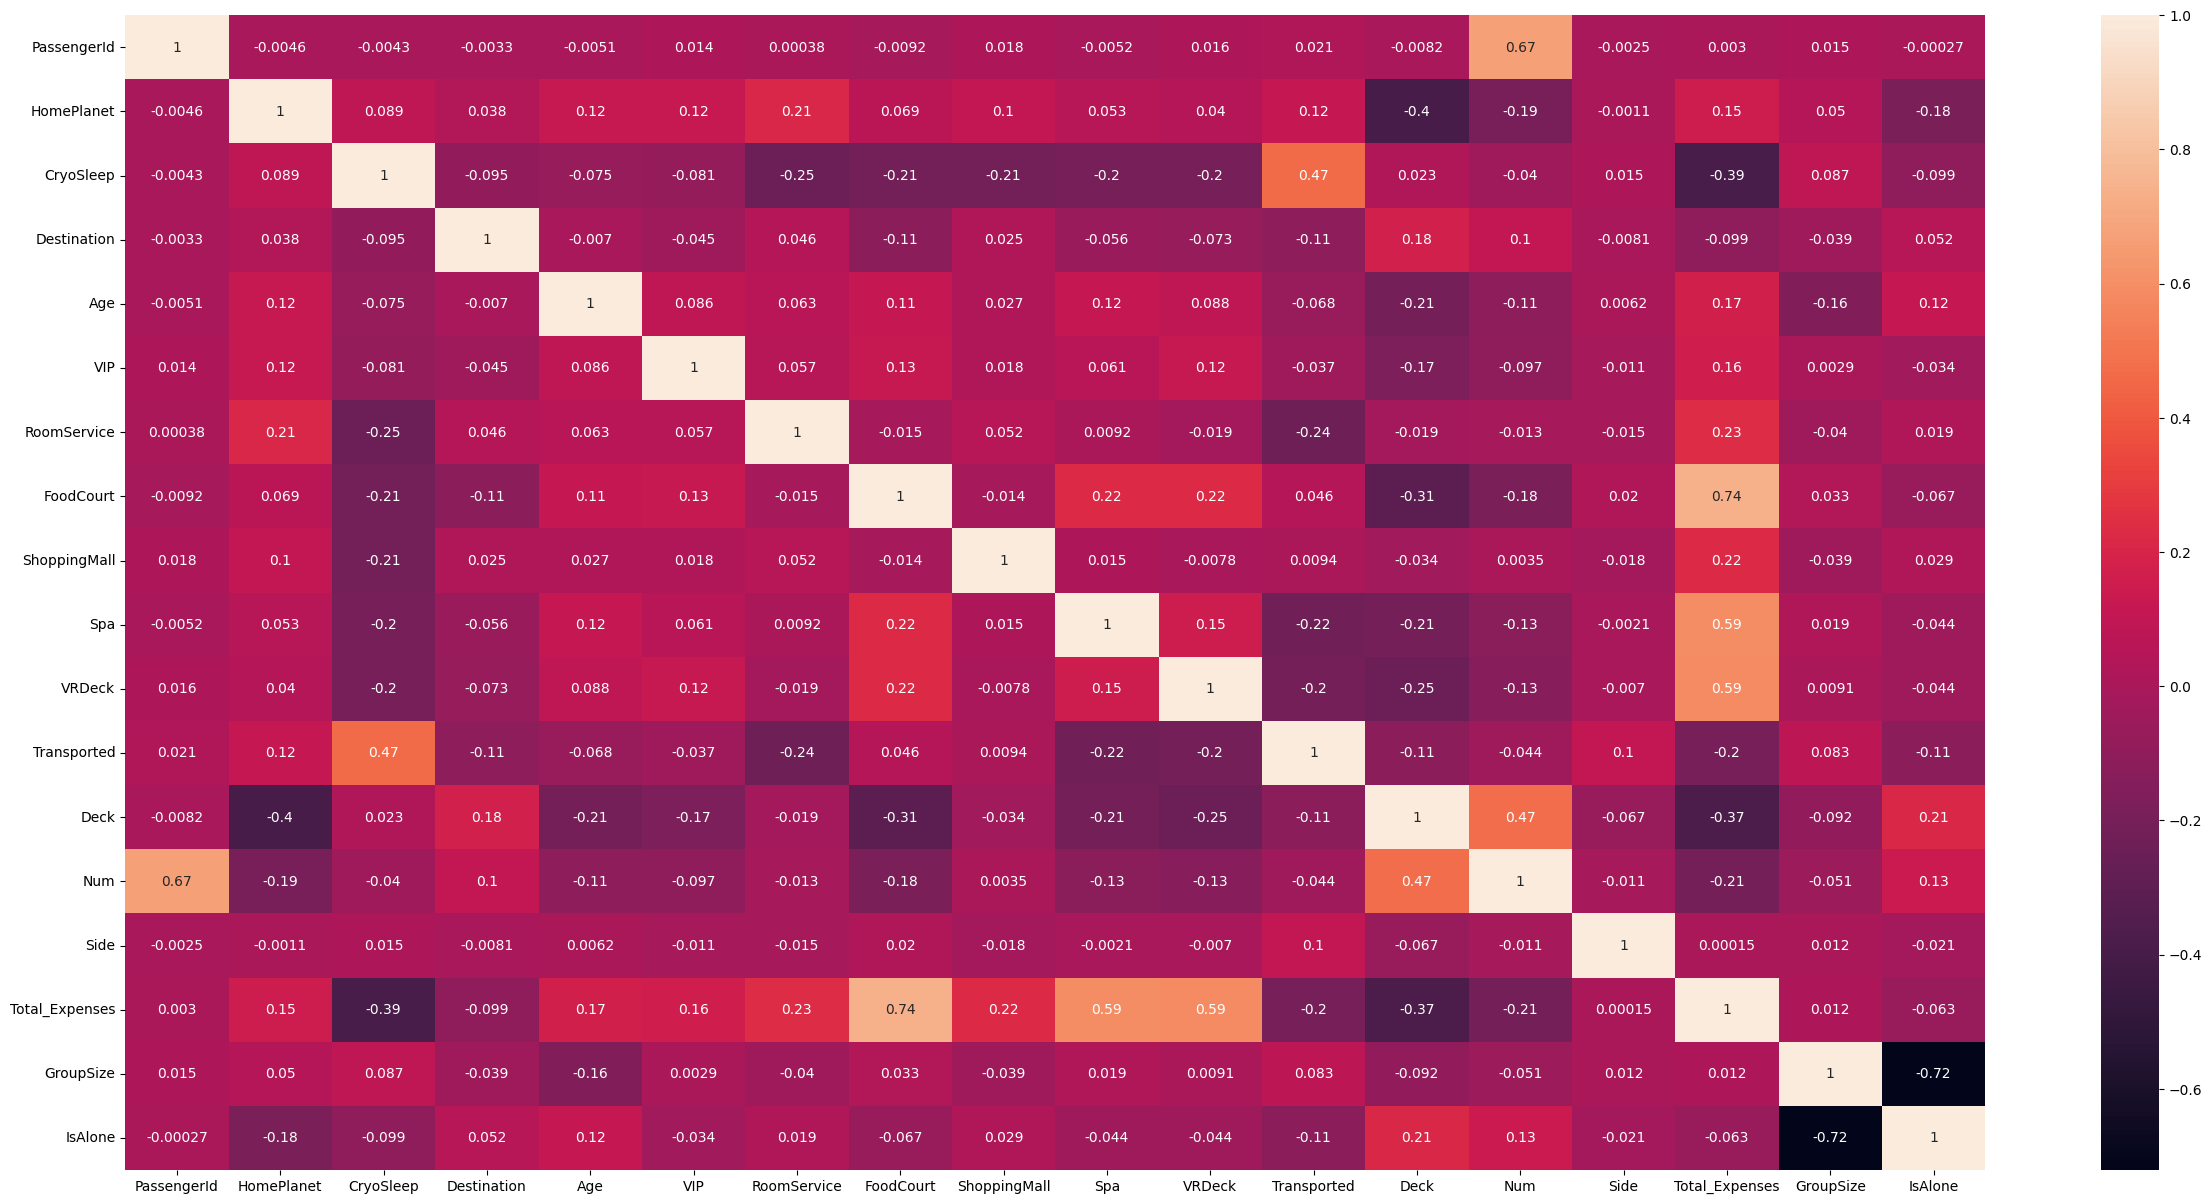

In [28]:
plt.figure(figsize=(30,15))
sns.heatmap(train_df.corr(),annot=True)

In [29]:
X = train_df.drop(["Transported", "PassengerId"], axis=1)
Y = train_df["Transported"]

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6519, 16)
(2174, 16)
(6519,)
(2174,)


In [31]:
models = {"Logistic Regression": LogisticRegression(max_iter=1000), "Decision Tree": DecisionTreeClassifier(), "RandomForest": RandomForestClassifier(), "Gradient Boost": GradientBoostingClassifier(random_state=1,n_estimators=250,learning_rate=0.15,max_depth=3), "SVM": SVC(), "KNN": KNeighborsClassifier(), "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'), "CatBoost": CatBoostClassifier(iterations=1500, eval_metric='Accuracy', verbose=0), "LightGBM": LGBMClassifier()}

model_results = {}

for name, model in models.items():
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    score = accuracy_score(Y_test, pred)
    model_results[name] = score

model_results_df = pd.DataFrame(list(model_results.items()), columns = ["Model","Accuracy"])
model_results_df.sort_values(by="Accuracy", ascending=False)

[LightGBM] [Info] Number of positive: 3281, number of negative: 3238
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1821
[LightGBM] [Info] Number of data points in the train set: 6519, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503298 -> initscore=0.013192
[LightGBM] [Info] Start training from score 0.013192


,Model,Accuracy
7,CatBoost,0.817847
8,LightGBM,0.812787
3,Gradient Boost,0.808188
6,XGBoost,0.806348
2,RandomForest,0.791628
0,Logistic Regression,0.791168
4,SVM,0.784269
5,KNN,0.768169
1,Decision Tree,0.757130


In [32]:
cbc = CatBoostClassifier(iterations=1500, eval_metric='Accuracy', verbose=0)
cbc.fit(X,Y)
Y_pred = cbc.predict(test_df.drop(["PassengerId"], axis=1))

submission = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Transported": Y_pred.astype(bool)})
submission.to_csv("submission.csv", index=False)